# Aplicação

O hospital Albert Einstein, em São Paulo, disponibilizou uma [base de dados](https://www.kaggle.com/einsteindata4u/covid19) de pacientes anônimos que fizeram o teste para o COVID-19, a base possui diversos dados clínicos dos pacientes junto ao resultado dos testes feitos.

Para demonstrar o uso do algoritmo de classificação Random Forest em um problema real, a base do COVID-19 foi utilizada para treinar um classificador utilizando a implementação do algoritmo disponível na biblioteca sklearn. O classificador possui o intuito de prever a condição de pacientes com a doença utilizando seus dados clínicos como sinais, sintomas, entre outras informações.

In [1]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

In [2]:
# Importando o dataset do Covid-19.
data = pd.read_excel('dataset.xlsx')

Antes de utilizar o classificador, é necessário tratar os dados ausentes e os atributos desnecessários. Para isso selecionamos apenas os atributos que possuem dados presentes em mais de 20% dos pacientes, e selecionamos apenas os pacientes sem dados ausentes nesses atributos.

In [3]:
# Retira os atributos que possuem dados presentes em menos de 20% dos pacientes
data_notnull = data.notnull().mean()*100
useful = data_notnull[data_notnull > 20]
data = data[[col for col in data.columns if col in useful]]

# Retira os pacientes que possuem algum dado ausente nos atributos selecionados.
data.dropna(subset=data.columns, inplace=True)

# Retira o atributo de identificação, irrelevante para a análise.
data.drop(columns=['Patient ID'], inplace=True)

# Transforma dados categóricos em numérico.
data = data.replace({'positive': 1, 'negative': 0,
                     'detected': 1, 'not_detected': 0})

# Mostra o número de pacientes e atributos após as transformações feitas.
print(f'Número de pacientes: {data.shape[0]}')
print(f'Número de atributos: {data.shape[1]}')
print('-------------------------')

# Mostra os atributos selecionados.
print('Atributos selecionados:')
print(', '.join(list(data)))

Número de pacientes: 1352
Número de atributos: 22
-------------------------
Atributos selecionados:
Patient age quantile, SARS-Cov-2 exam result, Patient addmited to regular ward (1=yes, 0=no), Patient addmited to semi-intensive unit (1=yes, 0=no), Patient addmited to intensive care unit (1=yes, 0=no), Respiratory Syncytial Virus, Influenza A, Influenza B, Parainfluenza 1, CoronavirusNL63, Rhinovirus/Enterovirus, Coronavirus HKU1, Parainfluenza 3, Chlamydophila pneumoniae, Adenovirus, Parainfluenza 4, Coronavirus229E, CoronavirusOC43, Inf A H1N1 2009, Bordetella pertussis, Metapneumovirus, Parainfluenza 2


Uma vez com os dados tratados em mãos, separamos o rótulo e os atributos preditivos a serem considerados pelo classificador.

In [4]:
# Resultado do exame.
y = data['SARS-Cov-2 exam result']

# Dados clínicos selecionados, sem o resultado do exame.
X = data.drop(columns=['SARS-Cov-2 exam result'])

Para treinar e testar o classificador, dividimos a base de dados em duas, uma com 70% dos pacientes para treinamento, e outra com 30% dos pacientes para testes.

In [5]:
# 70% para treinamento e 30% para teste.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

Para gerar o classificador utilizamos o `RandomForestClassifier` da biblioteca sklearn, e alguns parâmetros descritos abaixo:

* n_estimators = 100;
* Adicionar outros

In [6]:
classificador = RandomForestClassifier(n_estimators=100, random_state=21)

Com o método `fit` treinamos o classificador com os elementos de treino, e utilizamos o método `predict` para predizer os resultados dos elementos de teste, utilizando do classificador treinado:

In [7]:
classificador.fit(X_train, y_train)

y_pred = classificador.predict(X_test)

# Resultados obtidos pelo classificador.
print(y_pred)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1
 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0
 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


É possível visualizar a predição de cada uma dar árvores utilizando a função `apply`:

In [8]:
classificador.apply(X_test)

array([[ 48, 105,  17, ...,   7,  26,  95],
       [ 14,  15,  10, ...,   7,  10,  13],
       [ 28,  42,  42, ...,  33,  54,  40],
       ...,
       [ 14,  17,  13, ...,  21,  13,  17],
       [106, 136, 168, ...,  90, 121, 127],
       [106, 136, 164, ...,  90,  15, 125]])

Comparando os resultados obtidos com os de teste, podemos calcular a acurácia do classificador utilizando a função `score`:

In [9]:
acuracia = classificador.score(X_test, y_test)*100

print(f'Acurácia do classificador: {acuracia:.2f}%')

Acurácia do classificador: 91.63%


Apesar da acurácia alta, em bancos de dados desbalanceados, 

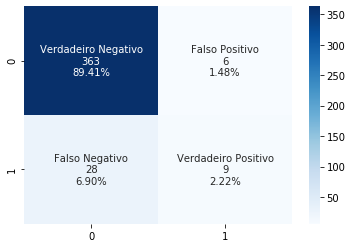

In [10]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import numpy as np

# Mostra a matriz de confusão dos resultados obtivos.
cf_matrix = confusion_matrix(y_test, y_pred)
group_names = ['Verdadeiro Negativo','Falso Positivo','Falso Negativo','Verdadeiro Positivo']
group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')

In [25]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.98      0.96       369
           1       0.60      0.24      0.35        37

    accuracy                           0.92       406
   macro avg       0.76      0.61      0.65       406
weighted avg       0.90      0.92      0.90       406

